# Deep learning - CNN - Reconnaissance de digits manuscrits avec Tensorflow et Keras

> import des bibliothèques

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn
from keras import datasets, layers, models, optimizers, losses, metrics
import pandas as pd
warnings.simplefilter(action='ignore')
from importation3 import Imp

> la classe Imp importe les images sous formes exploitables par la machine

In [2]:
cls = Imp()
X_train, y_train, X_test, y_test = cls.imp()
X_val, y_val = cls.imp_perso()

> vérification de la taille des données

In [3]:
print(f'Taille des données d\'entraînement : {X_train.shape}')
print(f'Taille de la cible d\'entraînement : {y_train.shape}')
print(f'Taille des données de test : {X_test.shape}')
print(f'Taille de la cible de test : {y_test.shape}')
print(f'Taille des données de validation : {X_val.shape}')
print(f'Taille de la cible de validation : {y_val.shape}')

Taille des données d'entraînement : (60000, 28, 28, 1)
Taille de la cible d'entraînement : (60000,)
Taille des données de test : (10000, 28, 28, 1)
Taille de la cible de test : (10000,)
Taille des données de validation : (30, 28, 28, 1)
Taille de la cible de validation : (30,)


> visualisation de la répartition des labels dans le jeu d'entraînement et dans le jeu de test

Text(0.5, 0, 'digits')

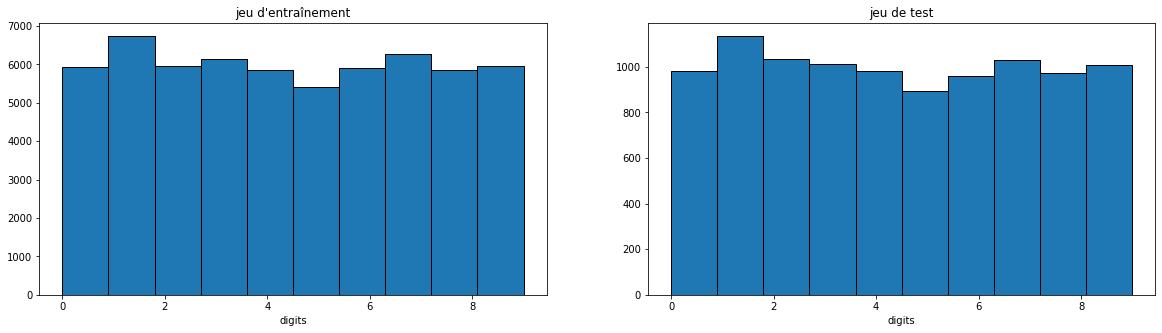

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('jeu d\'entraînement')
plt.hist(y_train, edgecolor="black")
plt.xlabel('digits')

plt.subplot(1, 2, 2)
plt.title('jeu de test')
plt.hist(y_test, bins=10, edgecolor="black")
plt.xlabel('digits')

Text(0.5, 1.0, 'répartition des données')

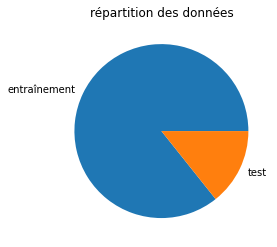

In [5]:

plt.pie([y_train.shape[0], y_test.shape[0]], labels=['entraînement', 'test'])
plt.title('répartition des données')

## Création du modèle CNN

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
Xtr, Xts, ytr, yts = train_test_split(X_train, y_train, random_state=3, shuffle=True, test_size=0.10)




X_train = np.concatenate((Xtr, Xts))
y_train = np.concatenate((ytr, yts))

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3,3), activation='sigmoid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (4,4), activation='sigmoid'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="sigmoid"))


2022-03-26 10:40:45.737502: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-26 10:40:45.737556: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (erwan-ThinkPad-T460s): /proc/driver/nvidia/version does not exist
2022-03-26 10:40:45.741406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        28736     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

## Entraînement du modèle

In [12]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3097 - accuracy: 0.9098 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 2/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0825 - accuracy: 0.9753 - val_loss: 0.0668 - val_accuracy: 0.9791
Epoch 3/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0531 - val_accuracy: 0.9847


<AxesSubplot:>

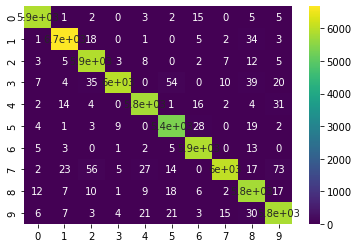

In [20]:
# prédiciton pour la matrice de confusion
y_pred = model.predict(X_train)
y = y_pred.argmax(axis=1)
seaborn.heatmap(confusion_matrix(y_train, y), annot=True, cmap='viridis')

## Enregistrement des erreurs

In [28]:
# indexing booléen
differents_values = X_train[y_train != y]
differents_values_labels = y_train[y_train != y]

liste = []
for i in range(differents_values.shape[0]):
    im = differents_values[i].ravel()
    liste.append(im)

liste = np.array(liste)

In [30]:
# Il y a 889 photos
liste.shape

(889, 784)

In [36]:
# export dans un dataframe
data = pd.DataFrame(liste)
data['y'] = differents_values_labels
data.to_csv('erreurs.csv', index=False)

## Evaluation du modèle

In [ ]:
# prédiciton pour la matrice de confusion
y_pred = model.predict(X_test)
y = y_pred.argmax(axis=1)
seaborn.heatmap(confusion_matrix(y_train, y), annot=True, cmap='viridis')

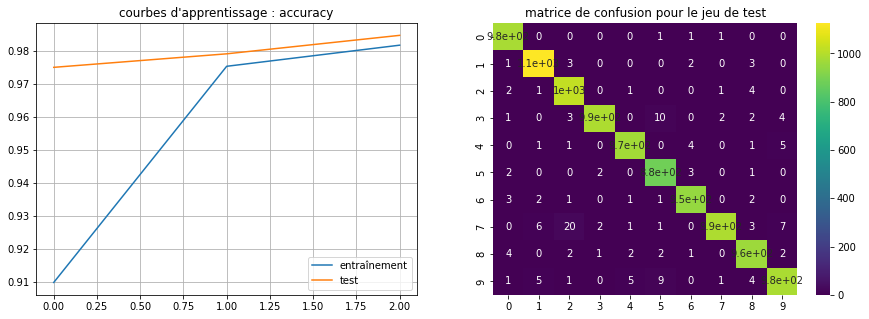

In [14]:
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(losses[['accuracy', 'val_accuracy']], label=['entraînement', 'test'])
plt.grid()
plt.legend()
plt.title('courbes d\'apprentissage : accuracy')

plt.subplot(1,2,2)
seaborn.heatmap(confusion_matrix(y_test, y), annot=True, cmap='viridis')
plt.title('matrice de confusion pour le jeu de test')

plt.savefig('courbe_acc.png')

## Evaluation sur un jeu de données créé spécialement pour la validation

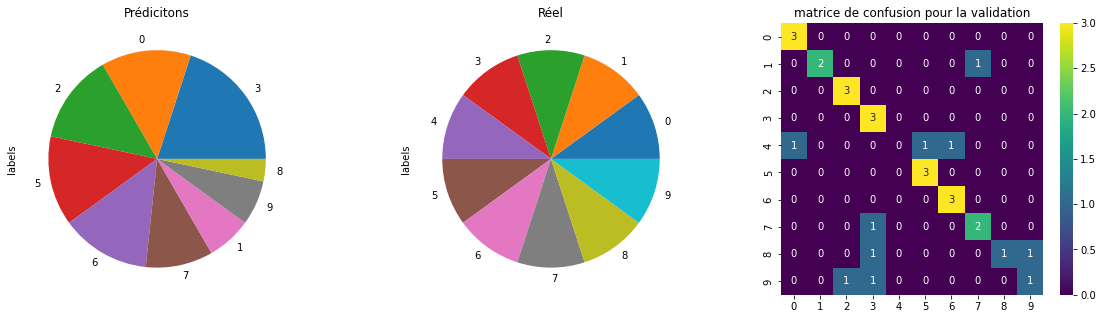

In [15]:
pred = model.predict(X_val)
pred = pred.argmax(axis=1)
pred_s = pd.Series(pred)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
pred_s.value_counts().plot.pie(title='Prédicitons', label='labels')

plt.subplot(1,3,2)
pred_s = pd.Series(y_val)
pred_s.value_counts().plot.pie(title='Réel', label='labels')

plt.subplot(1,3,3)
seaborn.heatmap(confusion_matrix(y_val, pred, ), annot=True, cmap='viridis')
plt.title('matrice de confusion pour la validation')


plt.savefig('evaluation.png')